In [21]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import interp

## Classification Algorithms ## 
from sklearn.neighbors import KNeighborsClassifier

## For building models ## 
from sklearn.model_selection import train_test_split

from sklearn.utils import resample

## For measuring performance ## 
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Ignore warnings ## 
import warnings 
warnings.filterwarnings('ignore')

In [22]:
col_names=['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in']
          
          
          

In [25]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data", names=col_names) 
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


<AxesSubplot:xlabel='lymphatics', ylabel='Density'>

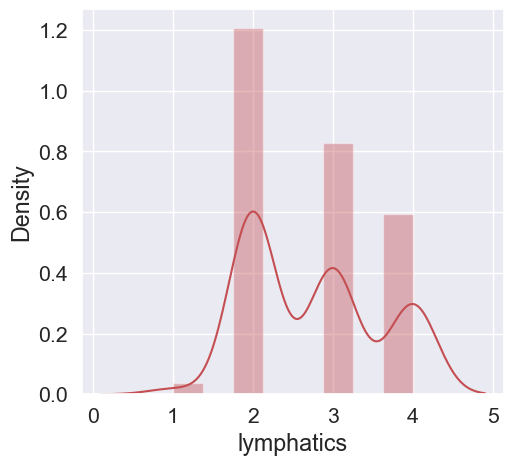

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['lymphatics'],color='r')

<AxesSubplot:xlabel='class', ylabel='Density'>

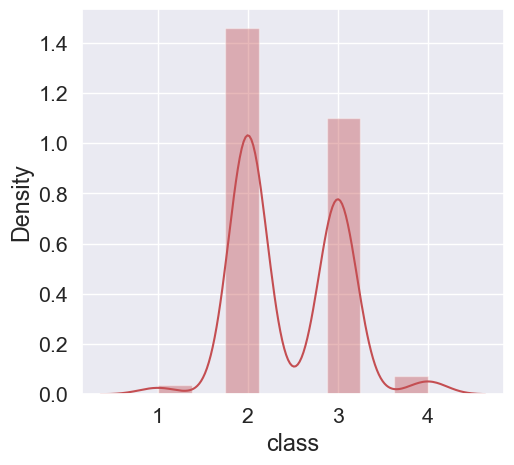

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(121) 
sns.distplot(df['class'], color='r')

<AxesSubplot:xlabel='lymphatics', ylabel='count'>

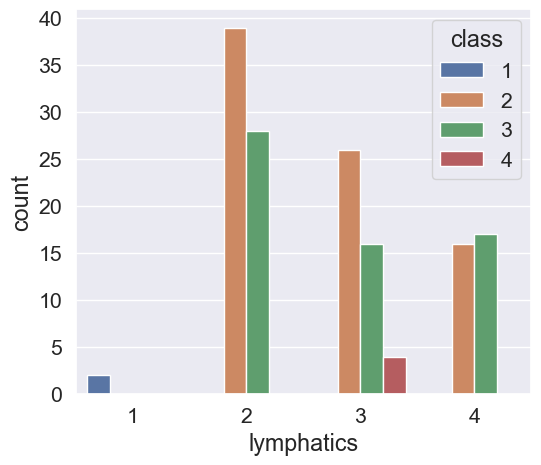

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(df["lymphatics"], hue=df[ 'class'])

In [29]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym   148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [31]:
df.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym     0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [32]:
x=df.drop('class',axis=1)
y=df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

###check shape to make sure it is all in order

print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format( x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Size of x_train: (103, 18) 	 Size of x_test: (45, 18) 
Size of y_train: (103,) 	 Size of y_test: (45,)


In [33]:
## Instantiate the models 
knn = KNeighborsClassifier(n_neighbors=2)
## Fit the model to the training set
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
knn_pred = knn.predict(x_test)

In [35]:
def confmatrix (y_pred, title):
    cm = metrics.confusion_matrix (y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique (y_test), index = np. unique (y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    plt.figure(figsize = (10,7))
    plt.title(title)

    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 18})

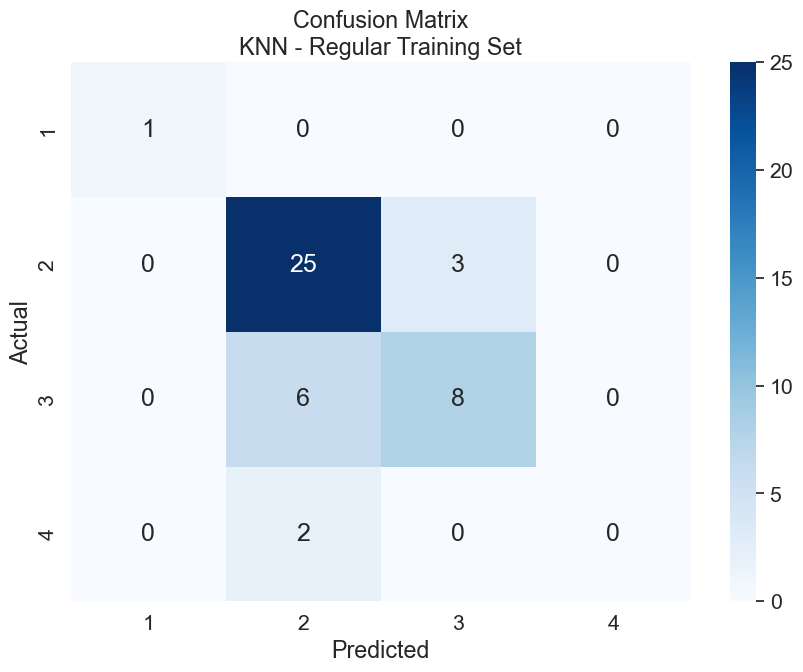

In [36]:
confmatrix(knn_pred, "Confusion Matrix\nKNN - Regular Training Set")

In [37]:

best_k={"Regular":0}
best_score= {"Regular":0}

for k in range(3, 50, 2):

    ## Using Regular training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)                             #Instantiate the model
    knn_temp.fit(x_train, y_train)                                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred)*100                  # Get accuracy
    if score >= best_score["Regular"] and score < 100:                          # Store best params
        best_score["Regular"] = score
        best_k["Regular"]=k
        
### print the best score and best k
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

---Results---
K: {'Regular': 9}
Score: {'Regular': 71.11111111111111}


In [38]:
knn_pred1= knn.predict(x_train)
knn_score1 = metrics.accuracy_score (y_train, knn_pred1) * 100 
print(knn_score1)

88.3495145631068


In [39]:
knn_score = metrics.accuracy_score(y_test, knn_pred)*100

### Print classification report for regular
print("----Regular Training Set Used----")
print("Classification report for {}:\n()".format(knn, metrics.classification_report(y_test, knn_pred))) 
print("Accuracy score:", knn_score)

----Regular Training Set Used----
Classification report for KNeighborsClassifier(n_neighbors=2):
()
Accuracy score: 75.55555555555556


In [40]:
def roccurve(x,y,classifier):
    y = label_binarize(y, classes=[1,2,3,4])
    n_classes = y.shape[1]
    Xtrain, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    y_score = classifier.fit(x_train, y_train).predict(x_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i]= auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"],_= roc_curve (y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr= np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr= np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr +=interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"]=all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw =lw,
            label= 'ROC curve of class {0} (area ={1:0.2f})'.format(i, roc_auc[i])) 
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

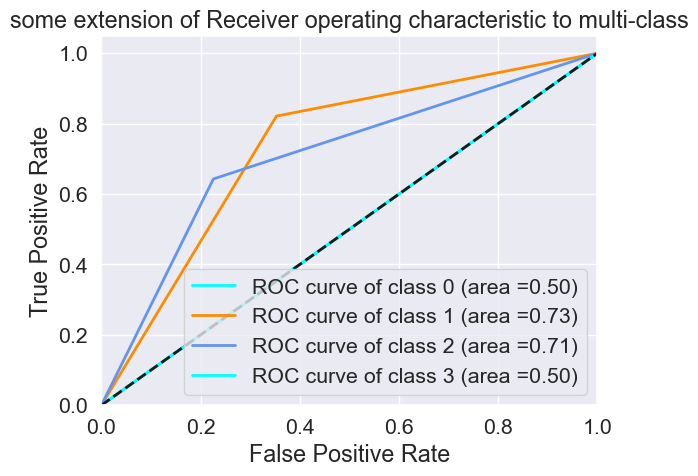

In [41]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score
classifier = (KNeighborsClassifier (n_neighbors=9))
roccurve(x,y,classifier)

In [42]:
import pickle
pickle.dump(knn,open("class.pkl",'wb'))